# X04: Introduction to Machine Learning

You might have heard of Machine Learning (ML) and it's a concept that can appear a little daunting at first, however the fundamental premise and some of the techniques and algorithms involved can actually be deceptively simple. 

We'll be using <a href = "http://scikit-learn.org/stable/">Scikit-Learn</a> library which makes creating and using ML algorithms simple.

<img src = "img/scikit.png">

You can install scikit-learn as follows from the command line:
    
    pip install scikit-learn

If you have the time and inclination, it's well worth also exploring the mathmatics behind ML as well. There is a good introduction <a href = "https://www.toptal.com/machine-learning/machine-learning-theory-an-introductory-primer">here</a>, and an excellent book by <a href = "http://robotics.stanford.edu/people/nilsson/MLBOOK.pdf">Nils J. Nilsson</a> as well as the <a href = "https://www.coursera.org/learn/machine-learning">Machine Learning course by Andrew Ng on Coursera</a>. 

However first we'll learn some basics.

## What is Machine Learning?

Machine learning is a mechanism for machines (aka computers) to learn behaviour with no human intervention, using pattern recognition algorithms (aka processes). There are two types of machine learning:

* <b>Supervised Learning</b>: We provide the computer with inputs in the form of historical data (Features), alongside their desired outputs (Classification), and the computer uses these to learn the mapping between the two in order to predict future events.<br/>

* <b>Unsupervised Learning</b>: We provide the computer with only inputs (Features) and it creates its own outputs from patterns in the data.

There is a specific process associated with performing Machine Learning as follows:

1. Load the data.
2. Split into a training and a test set.
3. Choose the model (aka algorithm, process) and parameters used to fit the input to the outputs.
4. Fit this model to the input training data and output training data.
5. Use this model to predict the outputs to your test set.
6. Check how well the model fits the test data.

## Machine Learning Models / Algorithms

Scikit-Learn has a number of machine learning algorithms included, however for this exercise we'll be looking at......

We'll start by importing the libraries and datasets we'll need as follows:

In [1]:
# Data / Maths libraries

import numpy as np
import pandas as pd
import sklearn

# Data Vis libraries

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data
from sklearn import datasets
iris = datasets.load_iris()         # SKL Dataset
iris_df = sns.load_dataset("iris")  # Seaborn Dataset

The data we're using is called the <a href = "https://en.wikipedia.org/wiki/Iris_flower_data_set">iris dataset</a> and comes pre-loaded with Scikit-Learn and Seaborn. This is a famous dataset and is used for a lot of examples.

In [49]:
iris_df.head(5)

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

We can use various methods in Seaborn to quickly and easily visualise the features data. Firstly we'll look at the pairplot, which is a good, if inflexible way to visualise data:

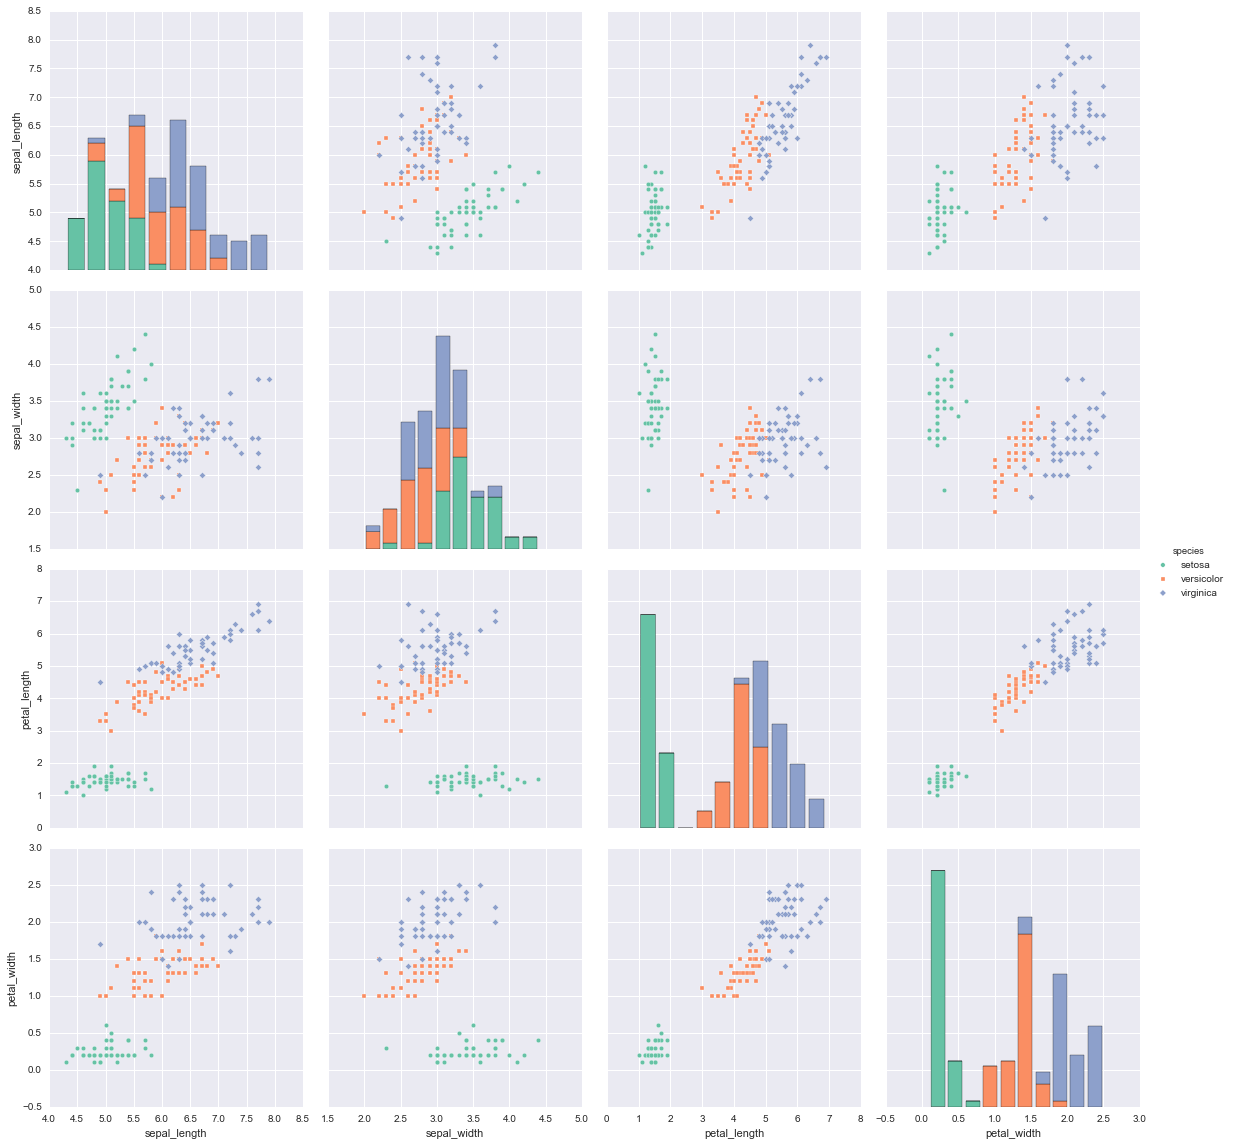

In [55]:
charts1 = sns.pairplot(iris_df, 
                       hue="species", 
                       palette="Set2",
                       markers=["o", "s", "D"],
                       size = 4)
charts1

We can also produce some regression plots by passing the kind='reg' keyword argument.

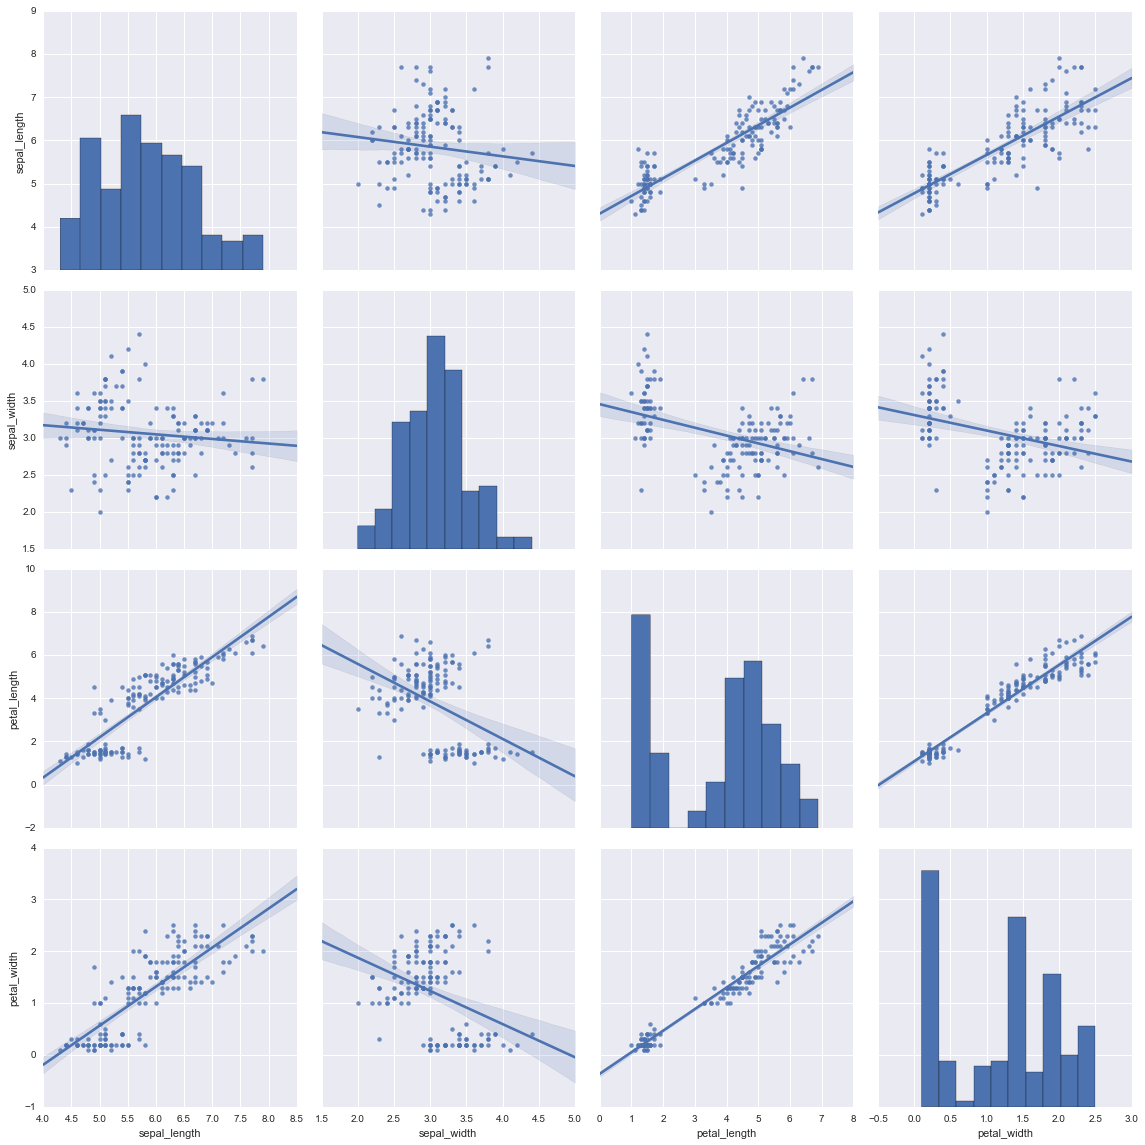

In [65]:
charts2 = sns.pairplot(iris_df,
                       kind="reg",
                       size = 4)
charts2

We can also use PairGrid and pass some methods to our chart object to customise the outputs further: 

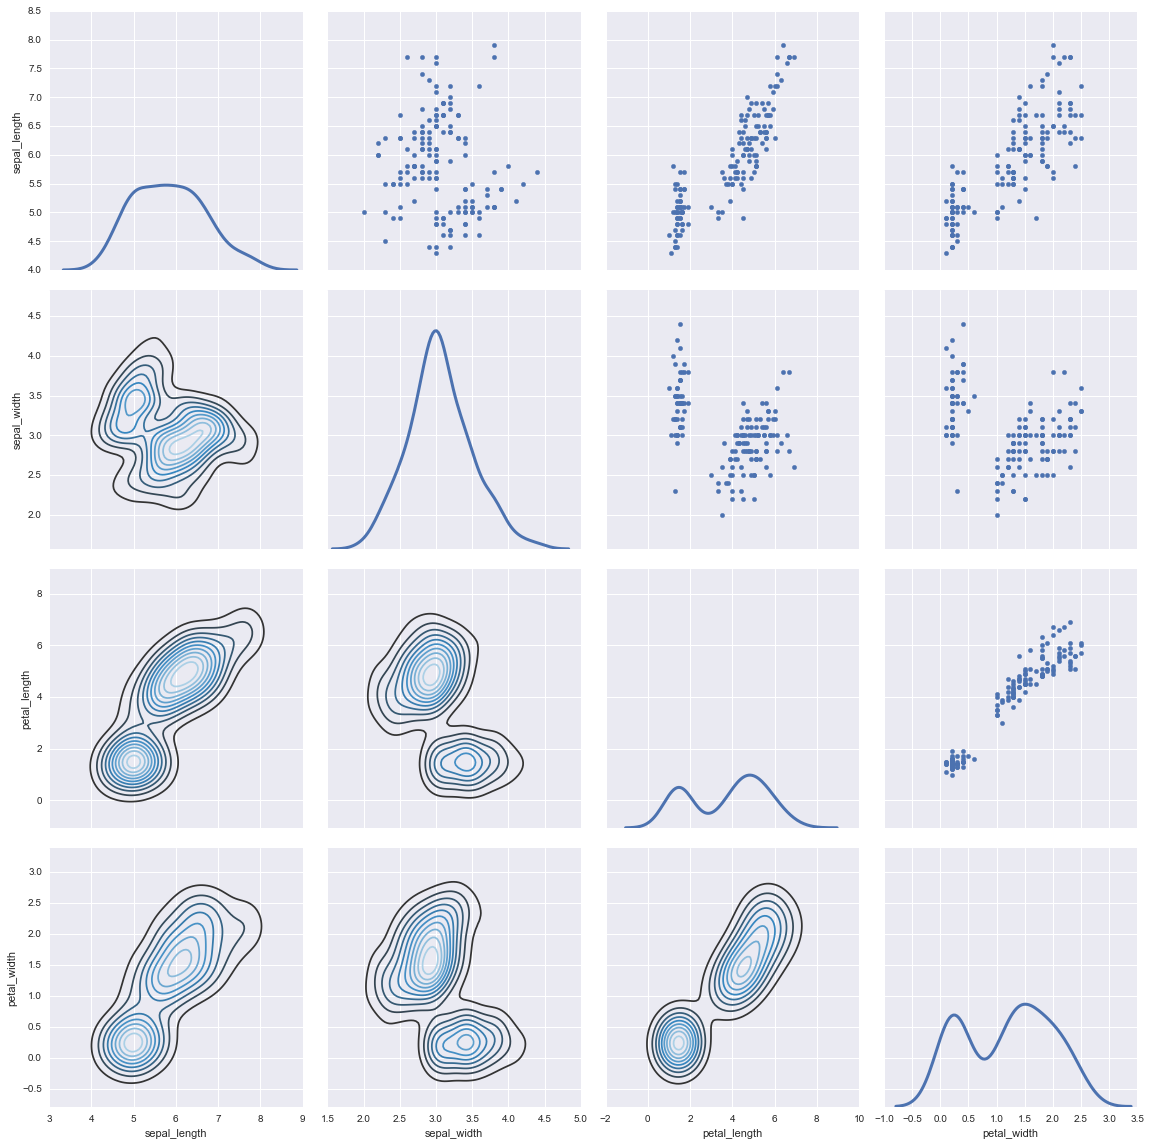

In [63]:
chart3 = sns.PairGrid(iris_df,size=4)
chart3 = chart3.map_upper(plt.scatter)
chart3 = chart3.map_lower(sns.kdeplot, cmap="Blues_d")
chart3 = chart3.map_diag(sns.kdeplot, lw=3, legend=False)

This helps us visualise the features of our data and pick an appropriate algorithm. In this particular case there are 3 classifications (the species: Setosa, Versicolor and Virginica) and as such a multi-class algorithm would be more appropriate. In this example we're going to use logistic regression, however the basic syntax to perform ML in scikit-learn is the same which makes swapping algorithms easy.

## Training, Testing and Cross Validation

We must split our data into two randomly selected groups. Splitting your data is important because you need to know how your algorithm will perform when it is presented with new data. This is called cross-validation. We will 'train' our algorithm with the training set (we'll give it the answers as an example) and we will 'test' our algortithm with the test set (we won't give it the answers to see how accurate it is).

A simple split where we use 40% of the data as a test set, using test_size=0.4.

The random_split variable is used as a seed for the random number generator used to make the split. This is good to set to the same number when you are training your algorithm, so your results are repeatable.

In [14]:
from sklearn import cross_validation

input_train, input_test, output_train, output_test = cross_validation.train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)

The variables we have created are as follows:

* <b>input_train</b> = Input data in the training set
* <b>input_test</b> = Input data in the test set
* <b>output_train</b> = output data in the training set
* <b>output_test</b> = output data in the test set

## Choosing and Fitting the Algorithm

Having looked at the data we've already decided upon a Logistic regression algorithm since we have multiple (as in more than 2) classes. However scikit-learn has a variety to choose from as follows:

* Linear regression
* Support Vector Machines
* Decision Trees
* Naive Bayes
* Clustering
* Neural Networks

To find out about these models and more see the <a href = "http://scikit-learn.org/stable/user_guide.html">scikit-learn</a> user guide.

For now we'll import the Logistic regression library and train our model with our training data:

In [15]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()               # Create a blank Logistic Regression Class object
model.fit(input_train, output_train)       # Train the model with the training set

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Predicting the Outputs

We can then use our model to predict the outputs to the test set. Again this is the same syntax no matter what the model.

In [16]:
model.predict(input_test)                # Predicting the results of the input testing data           

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 2, 0,
       0, 2, 0, 0, 1, 1, 0, 2, 2, 0, 2, 2, 2, 0, 2, 1, 1, 2, 0, 2, 0, 0, 1,
       2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2])

## Checking the Model

Now we have a working model we want to see how well it fits the test data (You must use the test data for this as you used the training data to build the model, so we'd expect this to be a good fit!)

We do this through measuring the accuracy, which is the fraction of outputs the model correctly predicted in your test set. 

You can find the accuracy (again for any choice of model) using the score() method as follows:

In [17]:
model.score(input_test,output_test)      # Testing the accuracy of our model

0.91666666666666663

As we can see our model can predict the type of flower based upon the input features to a 91% degree of accuracy. That's not bad!!

## Putting it all Together

So with just a few lines of code and a basic understanding of how ML works, we've been able to create a model that will predict a kind of flower based upon its petal and sepal width and length:

In [13]:
from sklearn import cross_validation
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

iris = datasets.load_iris()              # Loading the dataset
input_train,input_test,output_train,output_test = cross_validation.train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)
                                         # Splitting the data into training and testing datasets
model = LogisticRegression()             # Create a blank Logistic Regression Class object
model.fit(input_train, output_train)     # Train the model with the training set
model.predict(input_test)                # Predicting the results of the input testing data
model.score(input_test,output_test)      # Testing the accuracy of our model

0.91666666666666663

## Further Reading

TBC